# Heart Disease Prediction using Machine Learning

The Heart Disease prediction will have the following key takeaways:

1. Data insight: As mentioned here we will be working with the heart disease detection dataset and we will be putting out interesting inferences from the data to derive some meaningful results.
2. EDA: Exploratory data analysis is the key step for getting meaningful results.
3. Feature engineering: After getting the insights from the data we have to alter the features so that they can move forward for the model building phase.
4. Model building: In this phase, we will be building our Machine learning model for heart disease detection

# Importing Necessary Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Metrics for Classification technique

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

# Model building

In [44]:
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Data Loading
Here we will be using the pandas read_csv function to read the dataset. Specify the location of the dataset and import them.

In [45]:
data = pd.read_csv("C:/Users/Dickson/Downloads/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [46]:
data.shape

(918, 12)

Inference: We have a dataset with 303 rows which indicates a smaller set of data.

As above we saw the size of our dataset now let’s see the type of each feature that our dataset holds.

In [47]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Inference: The inference we can derive from the above output is:

Out of 12 features, we have 5 int types and only one with the float data types.

Woah! Fortunately, this dataset doesn’t hold any missing values.

As we are getting some information from each feature so let’s see how statistically the dataset is spread.

In [49]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [50]:
data.HeartDisease.unique()

array([0, 1], dtype=int64)

It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated so, Let’s check the correlation between various features.

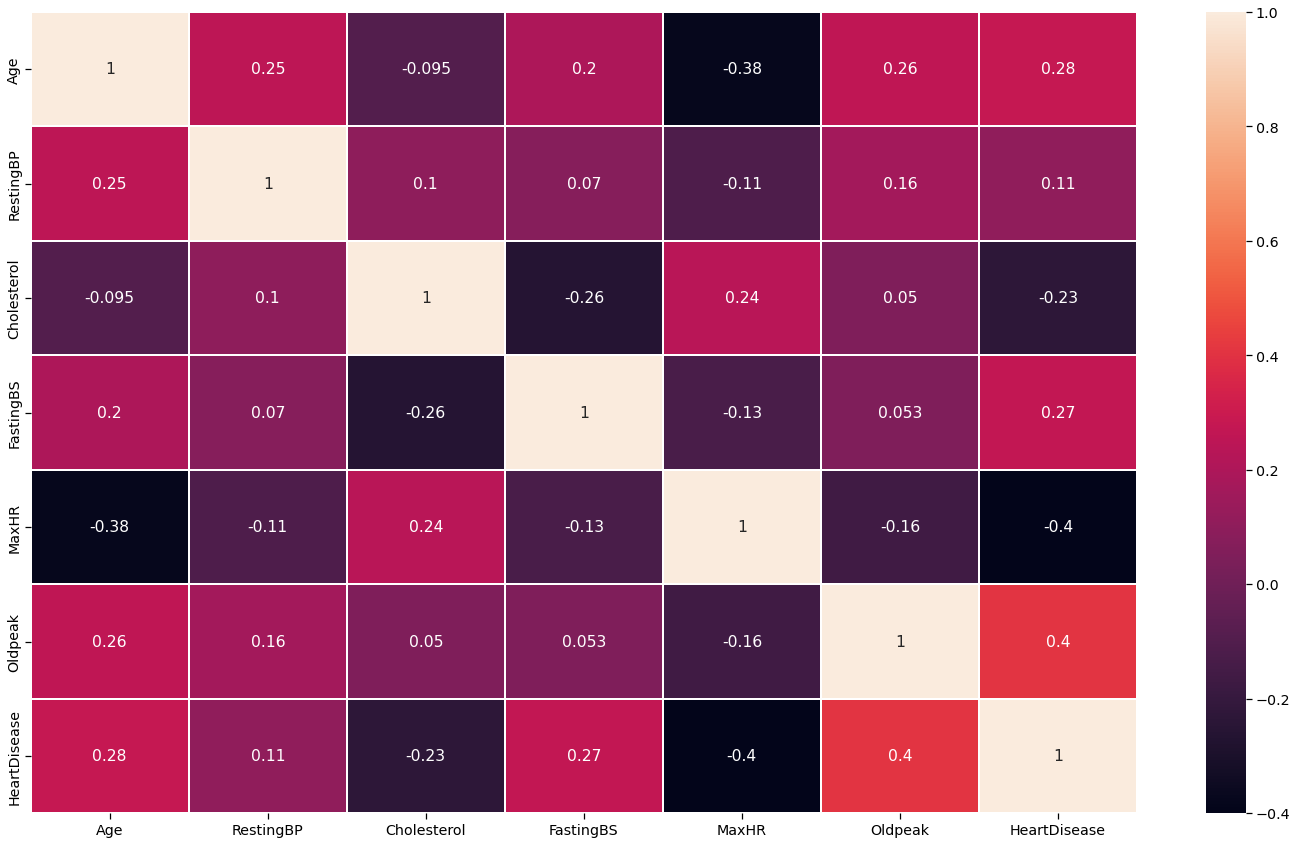

In [51]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

By far we have checked the correlation between the features but it is also a good practice to check the correlation of the target variable.

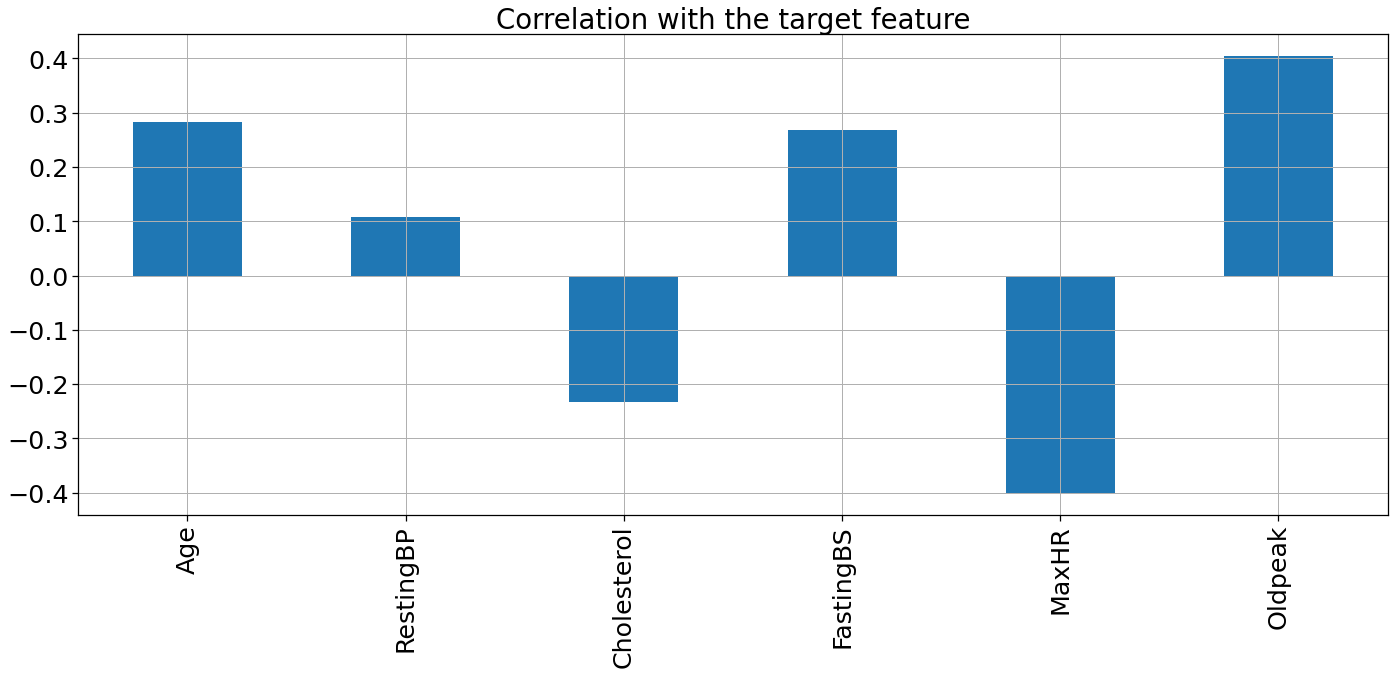

In [52]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('HeartDisease', axis=1).corrwith(data.HeartDisease).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

Inference: Insights from the above graph are:

1. Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
2. Other features are negatively correlated with the target feature.

So, we have done enough collective analysis now let’s go for the analysis of the individual features which comprises both univariate and bivariate analysis.

# Age(“age”) Analysis
Here we will be checking the 10 ages and their counts.

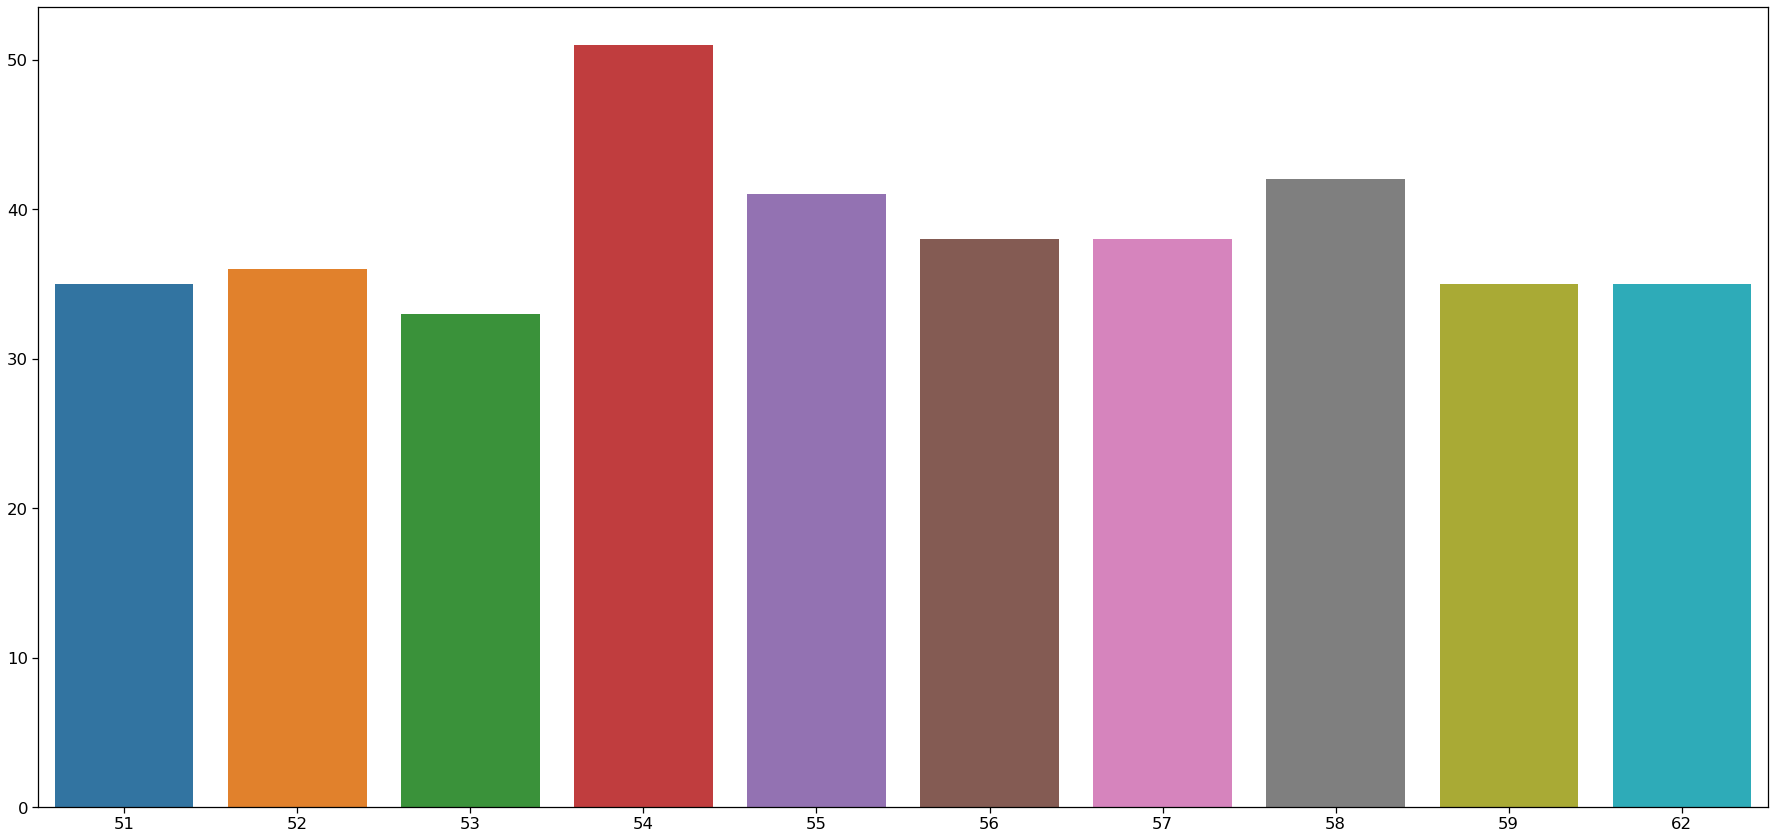

In [53]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.tight_layout()

Inference:  Here we can see that the 54 age column has the highest frequency.

Let’s check the range of age in the dataset.

In [54]:
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 28
Max Age : 77
Mean Age : 53.510893246187365


We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”

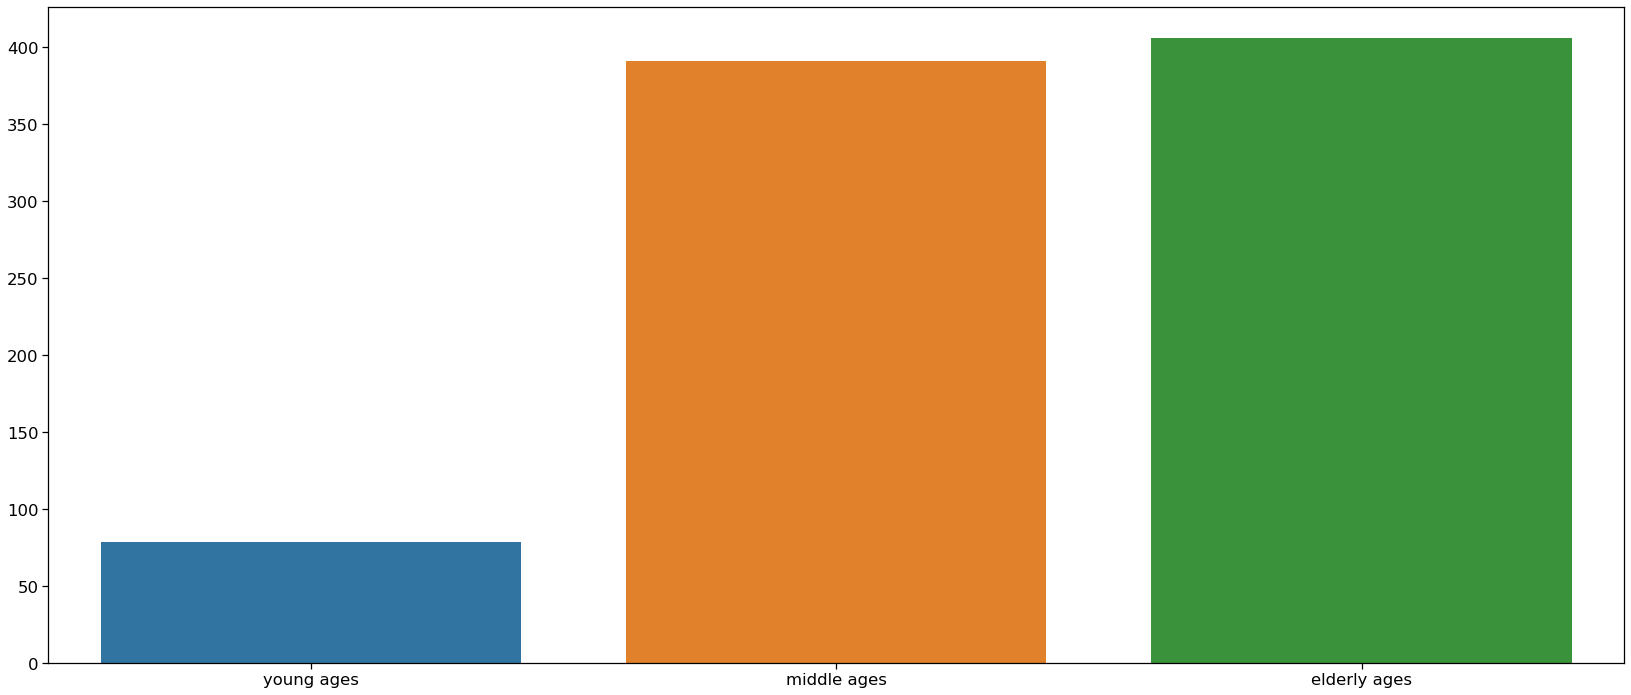

In [55]:
Young = data[(data.Age>=29)&(data.Age<40)]
Middle = data[(data.Age>=40)&(data.Age<55)]
Elder = data[(data.Age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

Inference: Here we can see that elder people are the most affected by heart disease and young ones are the least affected.

To prove the above inference we will plot the pie chart.

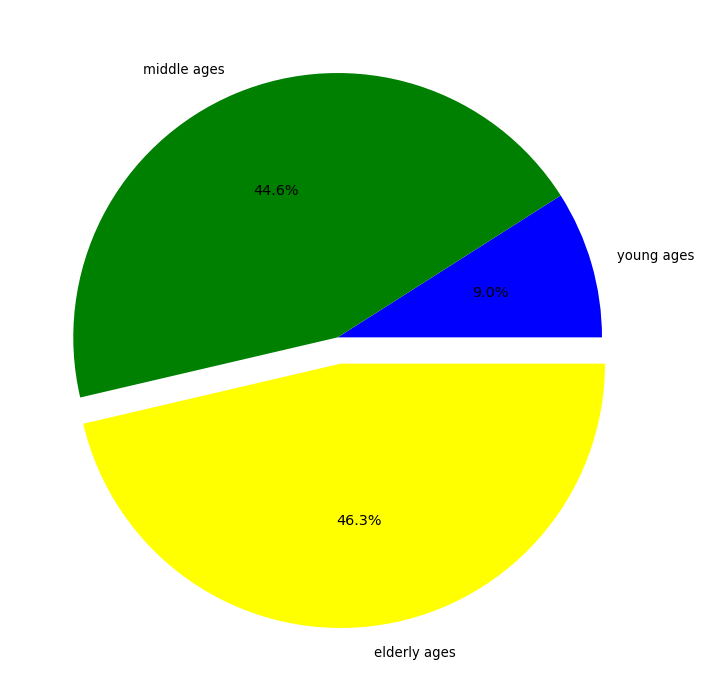

In [56]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

# Sex(“sex”) Feature Analysis

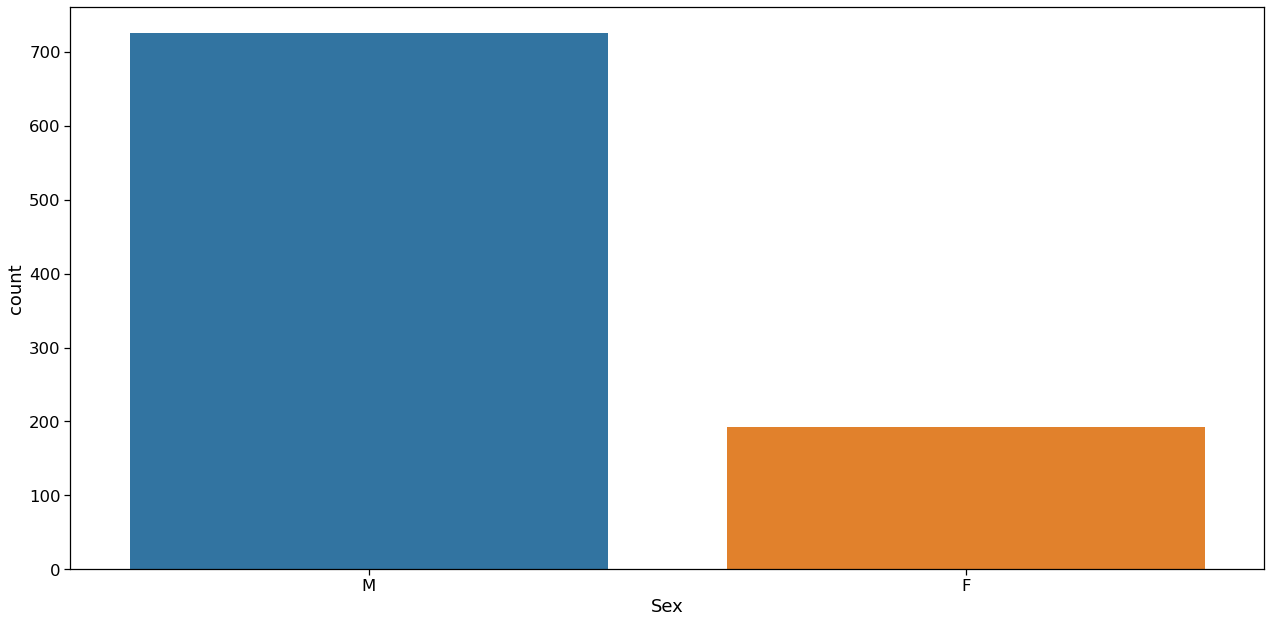

In [57]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['Sex'])
plt.tight_layout()

Inference: Here it is clearly visible that, Ratio of Male to Female is approx 2:1.

Now let’s plot the relation between sex and slope.

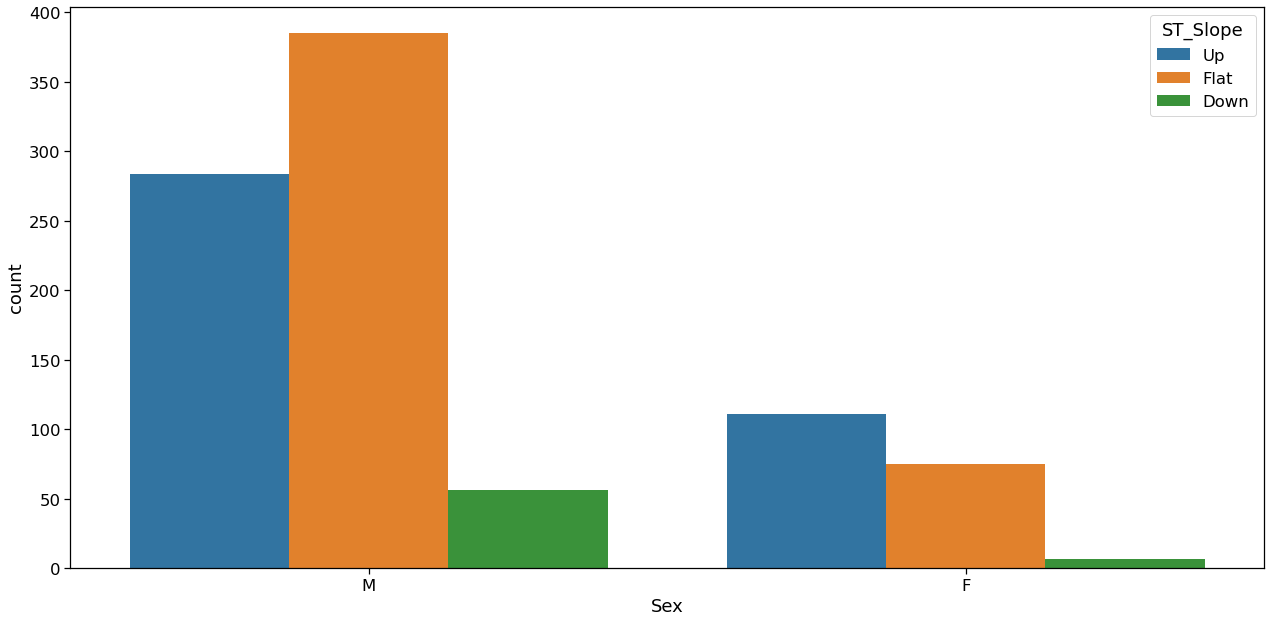

In [58]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['Sex'],hue=data["ST_Slope"])
plt.tight_layout()

Inference: Here it is clearly visible that the slope value is higher in the case of males(1).

# Chest Pain Type(“cp”) Analysis

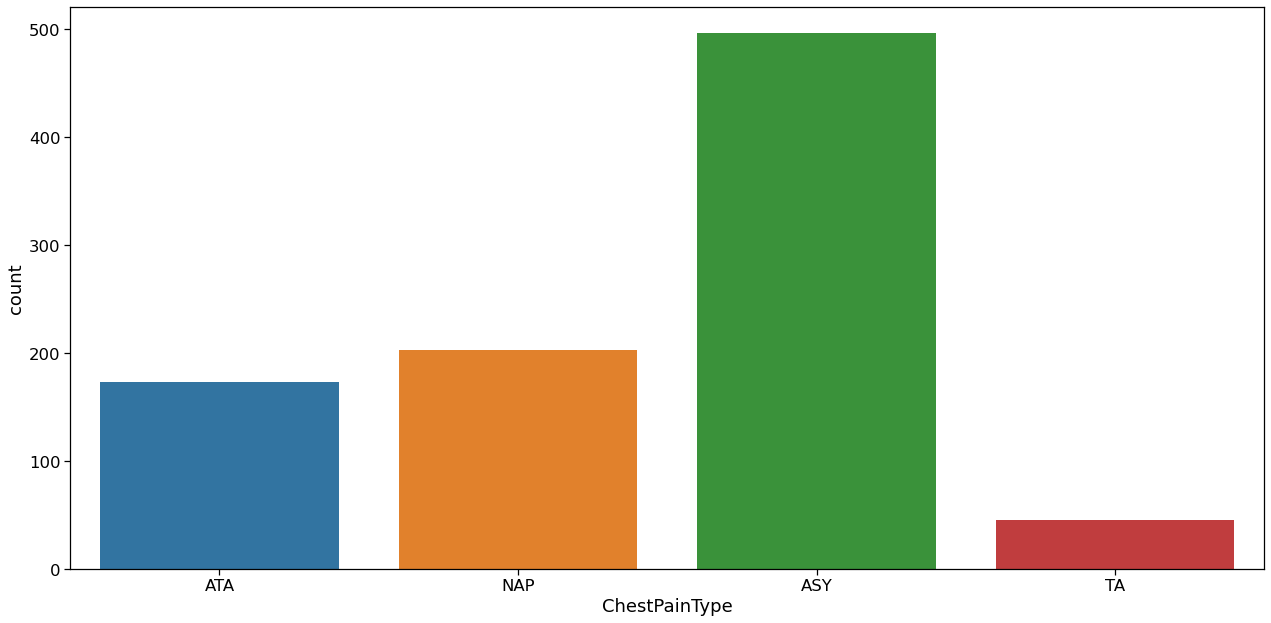

In [59]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['ChestPainType'])
plt.tight_layout()

Inference: As seen, there are 4 types of chest pain

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

# Analyzing cp vs target column

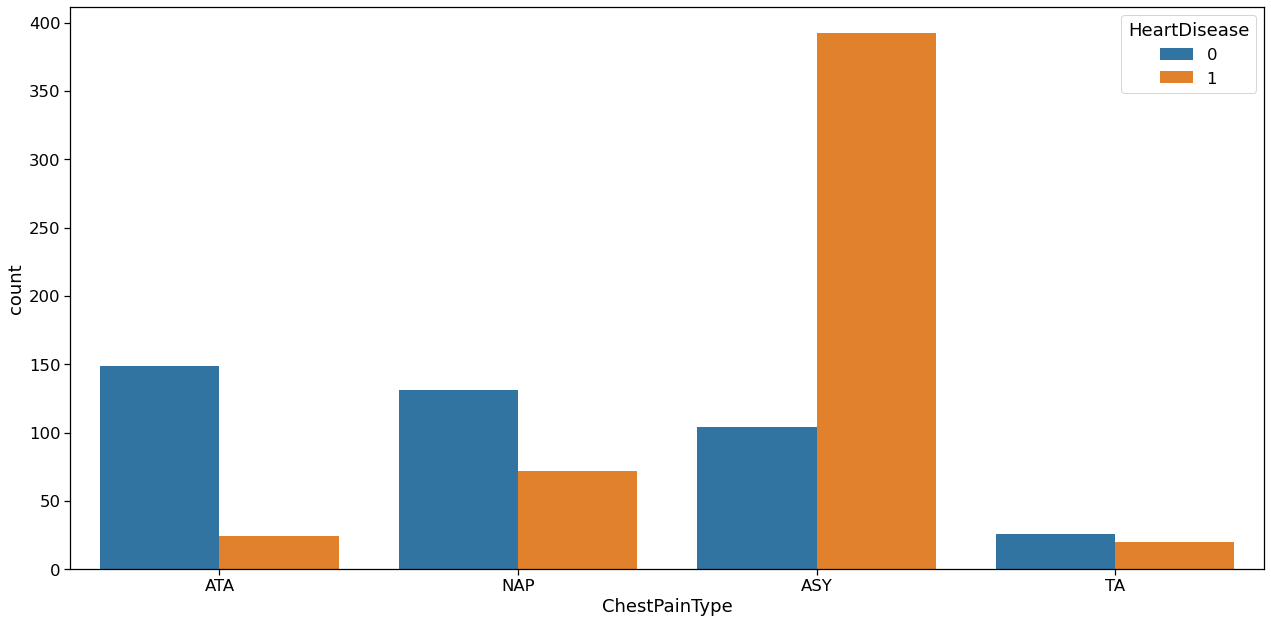

In [60]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['ChestPainType'],hue=data["HeartDisease"])
plt.tight_layout()

Inference: From the above graph we can make some inferences,

1. People having the least chest pain are not likely to have heart disease.
2. People having severe chest pain are likely to have heart disease.

Elderly people are more likely to have chest pain.

# Target

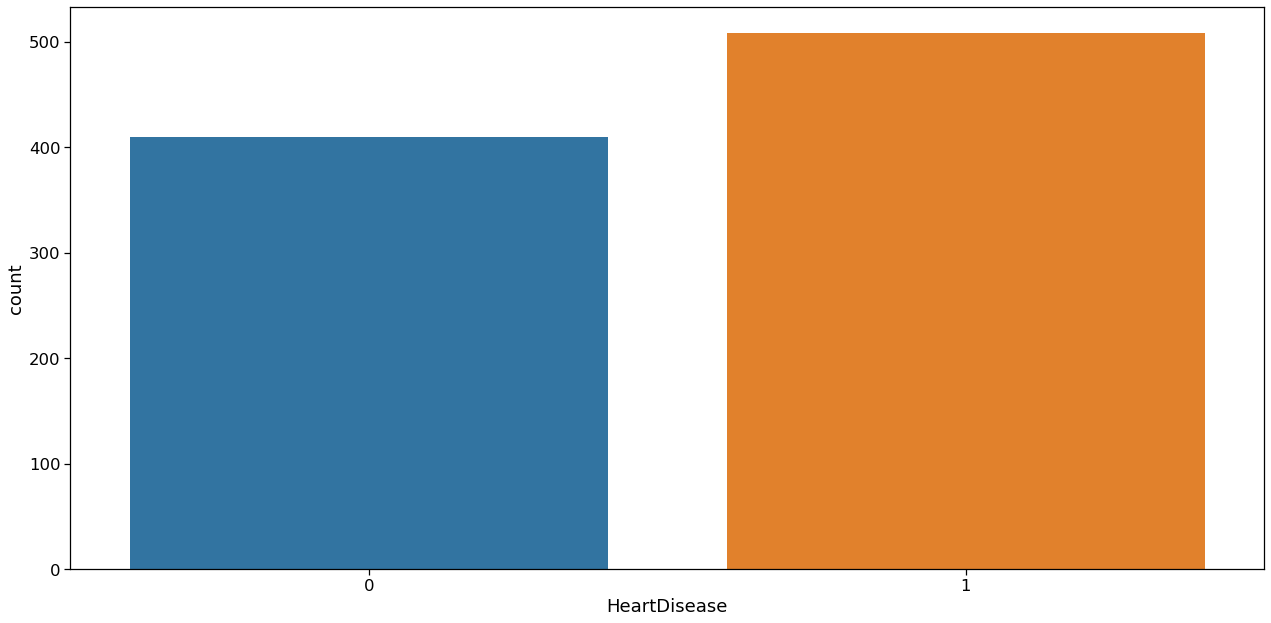

In [61]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['HeartDisease'])
plt.tight_layout()

In [62]:
len(data[(data.HeartDisease==1)])/len(data)

0.5533769063180828

Inference: The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. 

So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

# Feature Engineering
Now we will see the complete description of the continuous data as well as the categorical data

In [63]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
--------------------
Sex : ['M' 'F']
--------------------
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
--------------------
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
--------------------
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 3

Now here first we will be removing the target column from our set of features then we will categorize all the categorical variables using the get dummies method which will create a separate column for each category suppose X variable contains 2 types of unique values then it will create 2 different columns for the X variable.

In [64]:
categorical_val.remove('HeartDisease')
dfs = pd.get_dummies(data, columns = categorical_val,drop_first=True)
dfs.head(6)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1
5,39,120,339,170,0.0,0,1,0,1,0,0,1,0,0,0,1


In [65]:
dfs.head(6)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1
5,39,120,339,170,0.0,0,1,0,1,0,0,1,0,0,0,1


Now we will be using the standard scaler method to scale down the data so that it won’t raise the outliers also dataset which is scaled to general units leads to having better accuracy.

In [66]:
sc = StandardScaler()
col_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,1,1,0,0,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,0,0,1,0,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,1,1,0,0,0,0,1,0,0,1
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,0,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,1,0,1,0,0,1,0,0,0,1
5,-1.539213,-0.669935,1.282424,1.304332,-0.832432,0,1,0,1,0,0,1,0,0,0,1


# Modeling
Splitting our Dataset

In [67]:
X = dfs.drop('HeartDisease', axis=1)
y = dfs.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# The KNN Machine Learning Algorithm

In [68]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train,y_train)
y_pred1 = knn_model.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.8586956521739131


In [69]:
y_test.head(10)


668    0
30     1
377    1
535    1
807    0
793    1
363    1
583    0
165    1
483    1
Name: HeartDisease, dtype: int64

In [70]:
y_pred1[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

# Conclusion on Heart Disease Prediction
1. We did data visualization and data analysis of the target variable, age features, and whatnot along with its univariate analysis and bivariate analysis.

2. We also did a complete feature engineering part in this article which summons all the valid steps needed for further steps i.e.
model building.

3. From the above model accuracy, KNN is giving us the accuracy which is 87%.

In [71]:
import joblib
joblib.dump(knn_model,'heart_disease_predict_model.ml')

['heart_disease_predict_model.ml']

In [72]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [73]:
X_test.head(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
668,1.006537,0.410909,-0.034755,1.658016,-0.832432,0,1,0,0,0,1,0,0,0,1
30,-0.054192,0.681120,2.919751,-0.267596,-0.832432,1,0,1,0,0,1,0,0,1,0


In [74]:
X.shape[1]

15

In [75]:
import pickle
# open a file, where you ant to store the data
file = open('heart_disease_predict_model.pkl', 'wb')

# dump information to that file
pickle.dump(knn_model, file)